# Movies (Neural Network)

In [37]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import plotly.express as px

import pickle

In [7]:
df = pd.read_parquet("data/movies-clean.parquet")
df.shape

(8168, 23823)

In [8]:
df.head()

RATING  RunTime    TYPE  YEAR_FROM  YEAR_TO  Genre_Action  Genre_Adventure  \
0     6.1    121.0   Movie       2021     2021             1                0   
1     5.0     25.0  Series       2021     2021             1                1   
2     8.2     44.0  Series       2010     2022             0                0   
3     9.2     23.0  Series       2013     2013             0                1   
5     7.6     50.0  Series       2020     2020             1                0   

   Genre_Animation  Genre_Biography  Genre_Comedy  ...  Actor_Özge Borak  \
0                0                0             0  ...                 0   
1                1                0             0  ...                 0   
2                0                0             0  ...                 0   
3                1                0             1  ...                 0   
5                0                0             0  ...                 0   

   Actor_Özge Özpirinçci  Actor_Özgür Emre Yildirim  Actor_Özgür Ozan  \
0                      0                          0                 0   
1                      0                          0                 0   
2                      0                          0                 0   
3                      0                          0                 0   
5                      0                          0                 0   

   Actor_Özkan Ugur  Actor_Özz Nûjen  Actor_Úrsula Corberó  \
0                 0                0                     0   
1                 0                0                     0   
2                 0                0                     0   
3                 0                0                     0   
5                 0                0                     0   

   Actor_Úrsula Pruneda  Actor_Ülkü Duru  Actor_Þorsteinn Bachmann  
0                     0                0                         0  
1                     0                0                         0  
2                     0                0                         0  
3                     0                0                         0  
5                     0                0                         0  

[5 rows x 23823 columns]

## Encoding Type

In [9]:
df["TYPE"] = np.where(df["TYPE"] == "Movie", 1, 0)
df.dtypes

RATING                      float64
RunTime                     float64
TYPE                          int32
YEAR_FROM                     Int32
YEAR_TO                       Int32
                             ...   
Actor_Özz Nûjen               int64
Actor_Úrsula Corberó          int64
Actor_Úrsula Pruneda          int64
Actor_Ülkü Duru               int64
Actor_Þorsteinn Bachmann      int64
Length: 23823, dtype: object

## Feature / Target Selection

In [10]:
X = df.drop(columns=["RATING"])
y = df["RATING"]

## Standard Scaler

In [11]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

RunTime      TYPE  YEAR_FROM   YEAR_TO  Genre_Action  Genre_Adventure  \
0  1.216328  0.933637   0.681572  0.625929      1.851891        -0.442409   
1 -0.934956 -1.071081   0.681572  0.625929      1.851891         2.260354   
2 -0.509181 -1.071081  -0.772734  0.762476     -0.539989        -0.442409   
3 -0.979774 -1.071081  -0.376105 -0.466446     -0.539989         2.260354   
5 -0.374726 -1.071081   0.549363  0.489382      1.851891        -0.442409   

   Genre_Animation  Genre_Biography  Genre_Comedy  Genre_Crime  ...  \
0        -0.455794        -0.184185     -0.648667    -0.450298  ...   
1         2.193974        -0.184185     -0.648667    -0.450298  ...   
2        -0.455794        -0.184185     -0.648667    -0.450298  ...   
3         2.193974        -0.184185      1.541623    -0.450298  ...   
5        -0.455794        -0.184185     -0.648667     2.220751  ...   

   Actor_Özge Borak  Actor_Özge Özpirinçci  Actor_Özgür Emre Yildirim  \
0         -0.011065                    0.0                  -0.011065   
1         -0.011065                    0.0                  -0.011065   
2         -0.011065                    0.0                  -0.011065   
3         -0.011065                    0.0                  -0.011065   
5         -0.011065                    0.0                  -0.011065   

   Actor_Özgür Ozan  Actor_Özkan Ugur  Actor_Özz Nûjen  Actor_Úrsula Corberó  \
0               0.0         -0.011065        -0.011065             -0.011065   
1               0.0         -0.011065        -0.011065             -0.011065   
2               0.0         -0.011065        -0.011065             -0.011065   
3               0.0         -0.011065        -0.011065             -0.011065   
5               0.0         -0.011065        -0.011065             -0.011065   

   Actor_Úrsula Pruneda  Actor_Ülkü Duru  Actor_Þorsteinn Bachmann  
0             -0.011065        -0.011065                 -0.011065  
1             -0.011065        -0.011065                 -0.011065  
2             -0.011065        -0.011065                 -0.011065  
3             -0.011065        -0.011065                 -0.011065  
5             -0.011065        -0.011065                 -0.011065  

[5 rows x 23822 columns]

## Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((6534, 23822), (1634, 23822))

## Training

In [32]:
%%time
model = MLPRegressor(random_state=42,
                     hidden_layer_sizes=(3, 9, 3, ),
                     max_iter=1_000,
                     learning_rate="adaptive",
                     shuffle=True,
                     warm_start=True,
                     n_iter_no_change=200,
                     early_stopping=True,
                     validation_fraction=0.10,
                     verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 32.75744379
Validation score: -57.879178
Iteration 2, loss = 28.54548410
Validation score: -73.434966
Iteration 3, loss = 25.53590940
Validation score: -80.581266
Iteration 4, loss = 24.49664204
Validation score: -84.993121
Iteration 5, loss = 24.11698473
Validation score: -86.989759
Iteration 6, loss = 23.86499229
Validation score: -87.561061
Iteration 7, loss = 23.65540789
Validation score: -87.494019
Iteration 8, loss = 23.45742142
Validation score: -87.204129
Iteration 9, loss = 23.26310361
Validation score: -86.832808
Iteration 10, loss = 23.07079504
Validation score: -86.415536
Iteration 11, loss = 22.87912781
Validation score: -85.989818
Iteration 12, loss = 22.68839517
Validation score: -85.563316
Iteration 13, loss = 22.49826046
Validation score: -85.137966
Iteration 14, loss = 22.30914507
Validation score: -84.713751
Iteration 15, loss = 22.12092547
Validation score: -84.291206
Iteration 16, loss = 21.93352007
Validation score: -83.870664
Iteration 17, los

MLPRegressor(early_stopping=True, hidden_layer_sizes=(3, 9, 3),
             learning_rate='adaptive', max_iter=1000, n_iter_no_change=200,
             random_state=42, verbose=True, warm_start=True)

### Loss/Validation Curve

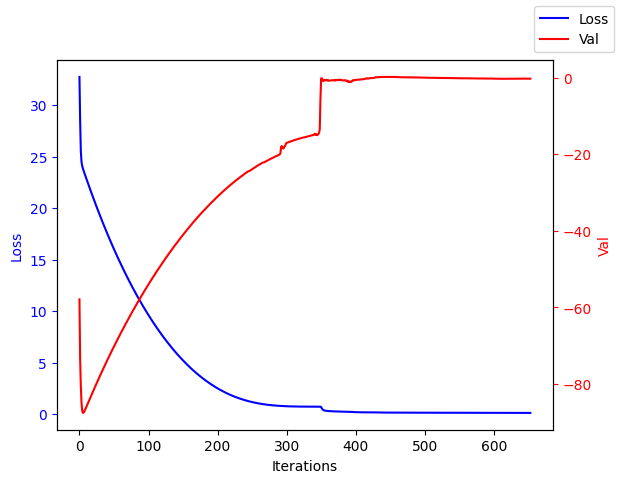

In [33]:
fig, ax1 = plt.subplots()

# Plot the first data set
ax1.plot(list(range(model.n_iter_)), model.loss_curve_, 'b-', label='Loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

# Create the second axis
ax2 = ax1.twinx()

# Plot the second data set
ax2.plot(list(range(model.n_iter_)), model.validation_scores_, 'r-', label='Val')
ax2.set_ylabel('Val', color='r')
ax2.tick_params('y', colors='r')

# Add legend
fig.legend()

# Show the plot
plt.show()

## Evaluation

### Test Evaluation

In [34]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"""
MAE: {mae:0.5f}
MSE: {mse:0.5f}
RMSE: {rmse:0.5f}
MAPE: {mape:0.5f}
""")


MAE: 0.80970
MSE: 1.11955
RMSE: 1.05809
MAPE: 0.13459



### Train Evaluation

In [35]:
predictions = model.predict(X_train)

mae = mean_absolute_error(y_train, predictions)
mse = mean_squared_error(y_train, predictions)
rmse = root_mean_squared_error(y_train, predictions)
mape = mean_absolute_percentage_error(y_train, predictions)

print(f"""
MAE: {mae:0.5f}
MSE: {mse:0.5f}
RMSE: {rmse:0.5f}
MAPE: {mape:0.5f}
""")


MAE: 0.36586
MSE: 0.39568
RMSE: 0.62903
MAPE: 0.05393



## Exporting Model

In [38]:
pickle.dump(model, open("objects/movies_model.pickle", "wb"))

## Post-Processing

In [39]:
predictions = model.predict(X_test)
df_predictions = pd.DataFrame(predictions)
df_predictions.head()

0
0  7.203312
1  7.711836
2  7.290879
3  6.343653
4  7.262630

In [40]:
df_predictions.describe()

0
count  1634.000000
mean      7.015905
std       0.628712
min       4.690362
25%       6.609158
50%       7.086354
75%       7.711836
max       7.711836

In [41]:
df_actual = pd.DataFrame(y_test)
df_actual.describe()

RATING
count  1634.000000
mean      6.934027
std       1.242010
min       2.100000
25%       6.200000
50%       7.100000
75%       7.800000
max       9.600000

<Axes: >

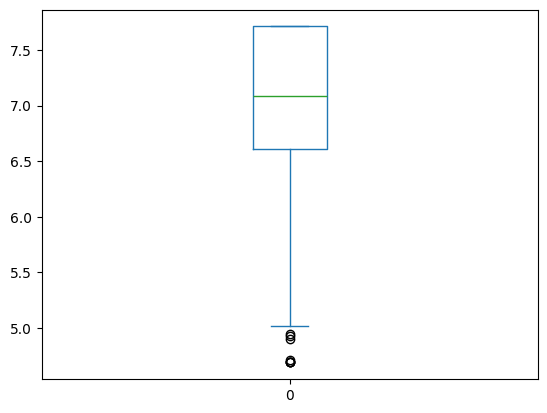

In [42]:
df_predictions.plot.box()

<Axes: >

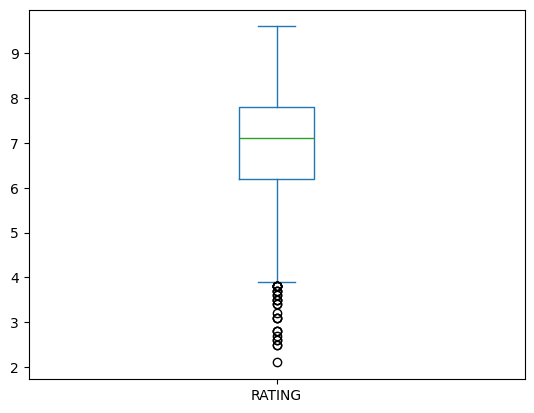

In [44]:
df_actual.plot.box()

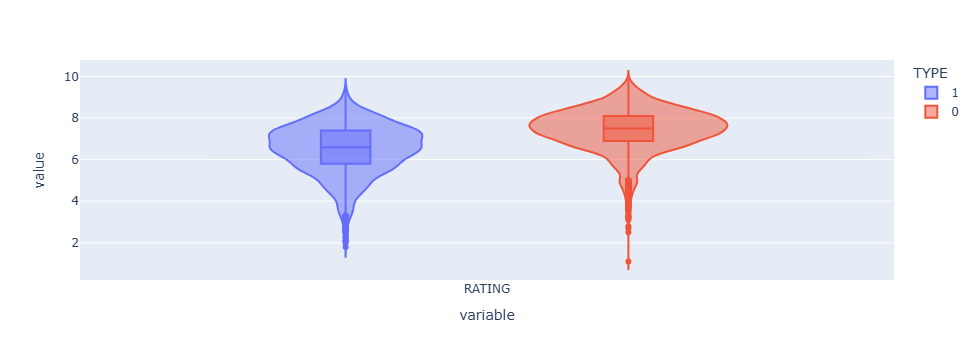

In [46]:
fig = px.violin(df,
                y=["RATING"],
                color="TYPE",
                box=True)
fig.show()

In [56]:
df[df["TYPE"] == 1].mean()["RATING"], df[df["TYPE"] == 0].mean()["RATING"]

(6.4891384051329055, 7.417849631966352)

In [47]:
df_actual.shape

(1634, 1)

## Random Prediction

In [49]:
import random

y_pred = []
for i in range(df_actual.shape[0]):
    n = random.randint(1, 10)
    y_pred.append(n)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"""
MAE: {mae:0.5f}
MSE: {mse:0.5f}
RMSE: {rmse:0.5f}
MAPE: {mape:0.5f}
""")


MAE: 2.91004
MSE: 12.30744
RMSE: 3.50820
MAPE: 0.43127



<Axes: >

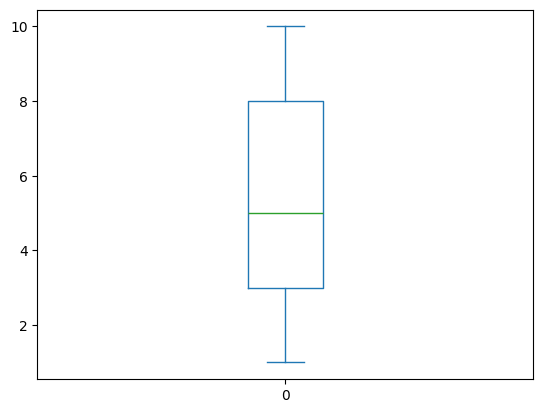

In [50]:
pd.DataFrame(y_pred).plot.box()

## Random Prediction (between 6 - 8)

In [51]:
import random

y_pred = []
for i in range(df_actual.shape[0]):
    n = random.randint(6, 8)
    y_pred.append(n)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"""
MAE: {mae:0.5f}
MSE: {mse:0.5f}
RMSE: {rmse:0.5f}
MAPE: {mape:0.5f}
""")


MAE: 1.18617
MSE: 2.24796
RMSE: 1.49932
MAPE: 0.19290



## Fixed Prediction (Mean value of 6.9)

In [52]:
y_pred = df_actual.shape[0] * [6.9]

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"""
MAE: {mae:0.5f}
MSE: {mse:0.5f}
RMSE: {rmse:0.5f}
MAPE: {mape:0.5f}
""")


MAE: 0.98531
MSE: 1.54280
RMSE: 1.24210
MAPE: 0.16171



## Movie: 6.5 / Series: 7.4

In [57]:
X_t = X_test.copy()
X_t["prediction"] = np.where(X_t["TYPE"] == 1, 6.6, 7.5)
y_pred = X_t["prediction"]

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"""
MAE: {mae:0.5f}
MSE: {mse:0.5f}
RMSE: {rmse:0.5f}
MAPE: {mape:0.5f}
""")


MAE: 1.02840
MSE: 1.86197
RMSE: 1.36454
MAPE: 0.18153



## Error Distribution

In [62]:
predictions = model.predict(X_test)

df_values = pd.DataFrame(y_test.values, columns=["Actual"])
df_values["Prediction"] = predictions
df_values["Error"] = df_values["Prediction"] - df_values["Actual"]
df_values

Actual  Prediction     Error
0        7.8    7.203312 -0.596688
1        8.7    7.711836 -0.988164
2        7.8    7.290879 -0.509121
3        6.0    6.343653  0.343653
4        7.2    7.262630  0.062630
...      ...         ...       ...
1629     7.9    7.105006 -0.794994
1630     7.7    7.711836  0.011836
1631     7.5    6.741622 -0.758378
1632     7.6    7.361824 -0.238176
1633     7.3    7.076960 -0.223040

[1634 rows x 3 columns]

In [64]:
df_values["Error"].mean()

0.08187794421466899

In [65]:
np.abs(df_values["Error"]).describe()

count    1634.000000
mean        0.809696
std         0.681341
min         0.002075
25%         0.288218
50%         0.633453
75%         1.173514
max         4.104819
Name: Error, dtype: float64

In [69]:
df_values["Abs_Error"] = np.abs(df_values["Error"])
df_values["TYPE"] = X_test["TYPE"].values
df_values.head()

Actual  Prediction     Error  Abs_Error      TYPE
0     7.8    7.203312 -0.596688   0.596688 -1.071081
1     8.7    7.711836 -0.988164   0.988164 -1.071081
2     7.8    7.290879 -0.509121   0.509121 -1.071081
3     6.0    6.343653  0.343653   0.343653  0.933637
4     7.2    7.262630  0.062630   0.062630  0.933637

In [71]:
df_values[df_values["TYPE"] >= 0.93]["Abs_Error"].describe()

count    884.000000
mean       0.892957
std        0.731429
min        0.002336
25%        0.327674
50%        0.705643
75%        1.315763
max        3.904451
Name: Abs_Error, dtype: float64

In [72]:
df_values[df_values["TYPE"] <= -1]["Abs_Error"].describe()

count    750.000000
mean       0.711558
std        0.602991
min        0.002075
25%        0.254173
50%        0.565814
75%        1.024742
max        4.104819
Name: Abs_Error, dtype: float64

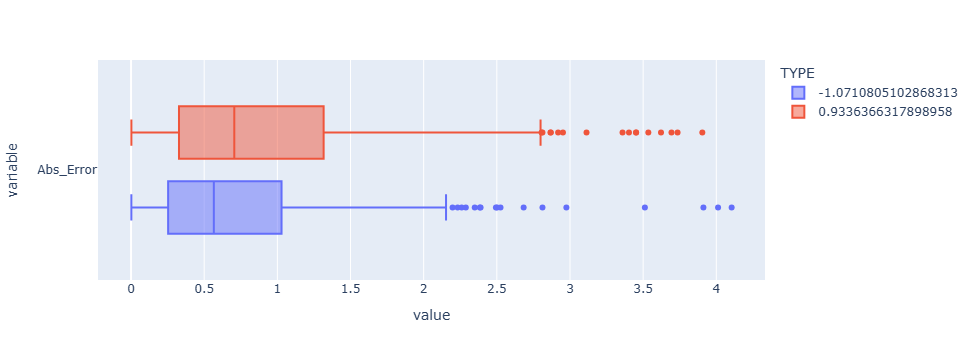

In [74]:
fig = px.box(df_values,
             x=["Abs_Error"],
             color="TYPE")
fig.show()

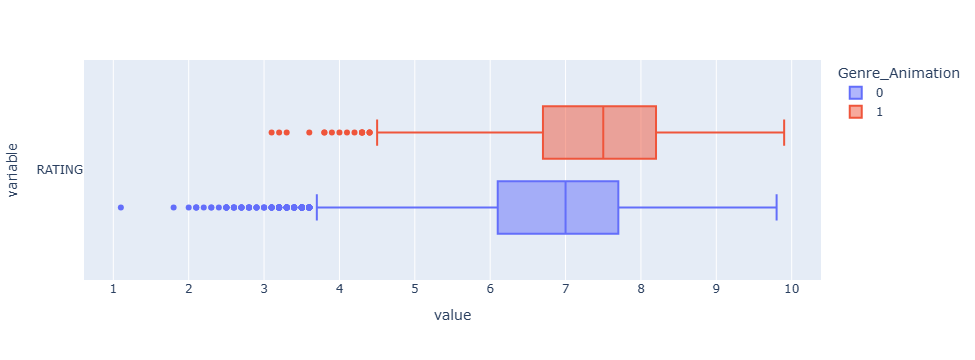

In [76]:
fig = px.box(df,
             x=["RATING"],
             color="Genre_Animation")
fig.show()

In [78]:
genres = [i for i in df.columns if i.startswith("Genre_")]
genres

['Genre_Action',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Biography',
 'Genre_Comedy',
 'Genre_Crime',
 'Genre_Documentary',
 'Genre_Drama',
 'Genre_Family',
 'Genre_Fantasy',
 'Genre_Film-Noir',
 'Genre_Game-Show',
 'Genre_History',
 'Genre_Horror',
 'Genre_Music',
 'Genre_Musical',
 'Genre_Mystery',
 'Genre_News',
 'Genre_Reality-TV',
 'Genre_Romance',
 'Genre_Sci-Fi',
 'Genre_Short',
 'Genre_Sport',
 'Genre_Talk-Show',
 'Genre_Thriller',
 'Genre_War',
 'Genre_Western']

In [86]:
genre_data = {} # initializing an empty dictionary
for col in genres:
    genre_data[col] = df[df[col] == 1]["RATING"]

df_genres = pd.DataFrame(data=genre_data)
df_genres.head()

Genre_Action  Genre_Adventure  Genre_Animation  Genre_Biography  \
0           6.1              NaN              NaN              NaN   
1           5.0              5.0              5.0              NaN   
2           NaN              NaN              NaN              NaN   
3           NaN              9.2              9.2              NaN   
5           7.6              NaN              NaN              NaN   

   Genre_Comedy  Genre_Crime  Genre_Documentary  Genre_Drama  Genre_Family  \
0           NaN          NaN                NaN          NaN           NaN   
1           NaN          NaN                NaN          NaN           NaN   
2           NaN          NaN                NaN          8.2           NaN   
3           9.2          NaN                NaN          NaN           NaN   
5           NaN          7.6                NaN          7.6           NaN   

   Genre_Fantasy  ...  Genre_News  Genre_Reality-TV  Genre_Romance  \
0            NaN  ...         NaN               NaN            NaN   
1            NaN  ...         NaN               NaN            NaN   
2            NaN  ...         NaN               NaN            NaN   
3            NaN  ...         NaN               NaN            NaN   
5            NaN  ...         NaN               NaN            NaN   

   Genre_Sci-Fi  Genre_Short  Genre_Sport  Genre_Talk-Show  Genre_Thriller  \
0           NaN          NaN          NaN              NaN             6.1   
1           NaN          NaN          NaN              NaN             NaN   
2           NaN          NaN          NaN              NaN             8.2   
3           NaN          NaN          NaN              NaN             NaN   
5           NaN          NaN          NaN              NaN             NaN   

   Genre_War  Genre_Western  
0        NaN            NaN  
1        NaN            NaN  
2        NaN            NaN  
3        NaN            NaN  
5        NaN            NaN  

[5 rows x 27 columns]

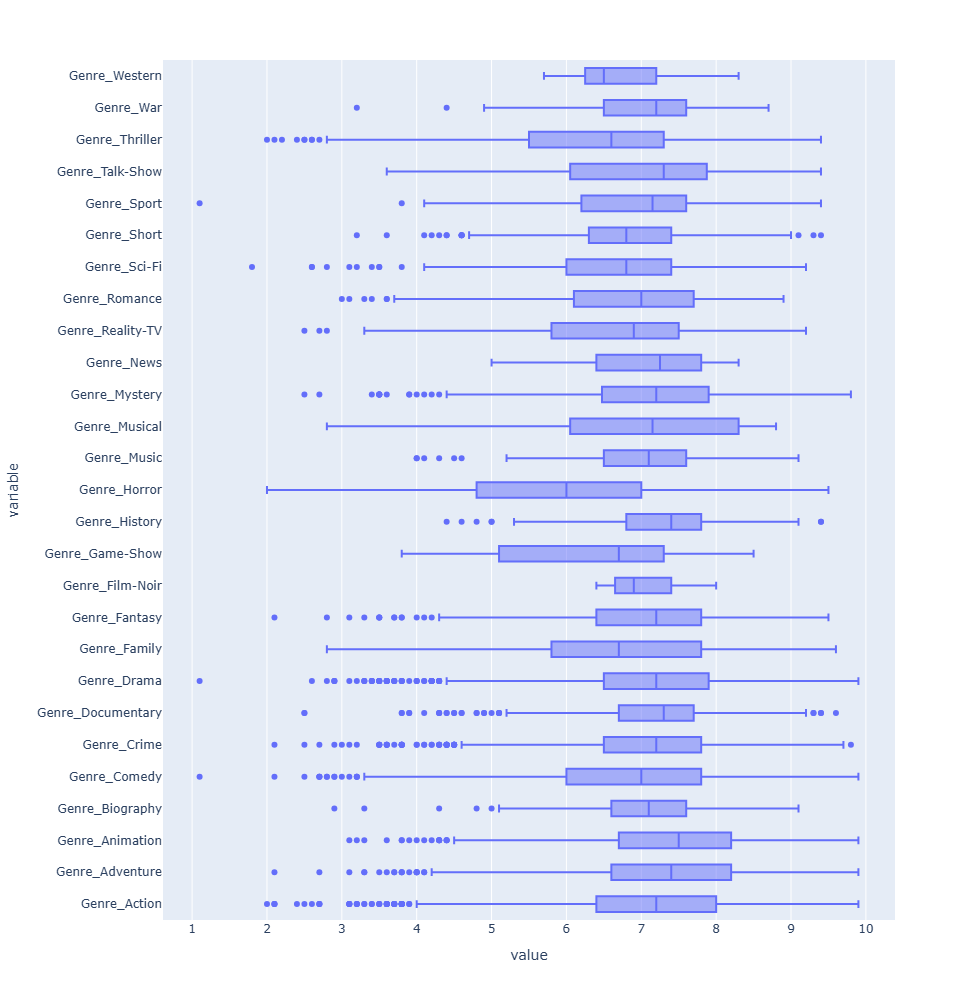

In [85]:
fig = px.box(df_genres,
             x=genres,
             height=1000)
fig.show()